# This notebook has the plotting codes; use fitting_na_16.ipynb to run optimizations

In [1]:
import numpy as np
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats
import bluepyopt as bpop
import curve_fitting as cf
import bluepyopt.deapext.algorithms as algo
import generalized_genSim_shorten_time as ggsd
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
from deap import tools
import multiprocessing
import eval_helper_na16 as eh16

In [2]:
# just set parameters here, then simply click through to get a dictionary of parameters as well as plots
new_par = [29.37455303390747, -57.73385584119139, 11.891550446498853, 0.7034480970709812, 0.7458471676703804, -76.54492828977375, -4.360135868594882, 1.0753187187691573, 7.743820332718601, 0.4342886254656672, 0.42061600443361485, 1.8527146017814786, 0.17671265620260843, 0.04089488556627415, -37.52777117761381, 4.1662221609375685, -104.4691271236539, 0.05585446125335954, 29.571131958843388, 2.5137334884656872, 56.76570675176218, -116.41680866340164, -6.558415415201545, 48.5320376591091]

In [3]:
# use this to make a dictionary out of the parameters
eh16.make_params_dict(new_par)

{'sh_na16': 29.37455303390747,
 'tha_na16': -57.73385584119139,
 'qa_na16': 11.891550446498853,
 'Ra_na16': 0.7034480970709812,
 'Rb_na16': 0.7458471676703804,
 'thi1_na16': -76.54492828977375,
 'thi2_na16': -4.360135868594882,
 'qd_na16': 1.0753187187691573,
 'qg_na16': 7.743820332718601,
 'mmin_na16': 0.4342886254656672,
 'hmin_na16': 0.42061600443361485,
 'q10_na16': 1.8527146017814786,
 'Rg_na16': 0.17671265620260843,
 'Rd_na16': 0.04089488556627415,
 'thinf_na16': -37.52777117761381,
 'qinf_na16': 4.1662221609375685,
 'vhalfs_na16': -104.4691271236539,
 'a0s_na16': 0.05585446125335954,
 'zetas_na16': 29.571131958843388,
 'gms_na16': 2.5137334884656872,
 'smax_na16': 56.76570675176218,
 'vvh_na16': -116.41680866340164,
 'vvs_na16': -6.558415415201545,
 'Ena_na16': 48.5320376591091}

(actual, goal)
activation v half: (10.459999999999999, 10.59)
activation slope: (1.7071197411003238, 1.456)
(actual, goal)
inactivation v half: (18.759999999999998, 18.83)
inactivation slope: (0.6713681241184767, 1.31)
tau: (0.6811032371885206, 0.18)
persistent current: (1.9861912612687758, 2.0)


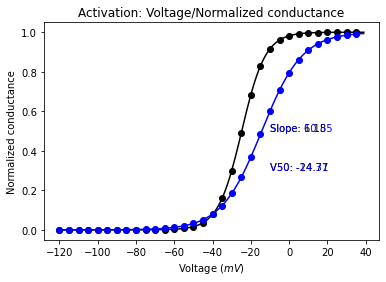

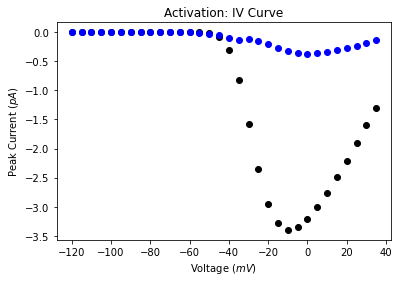

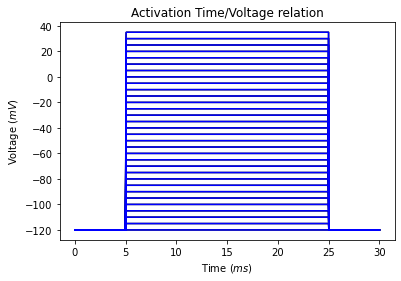

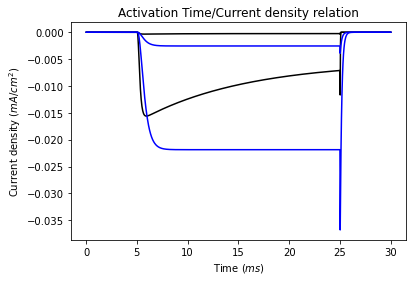

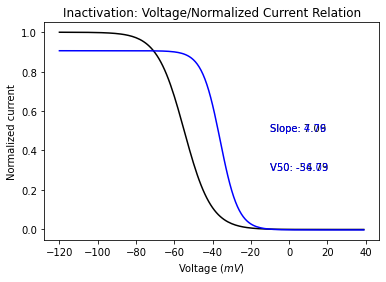

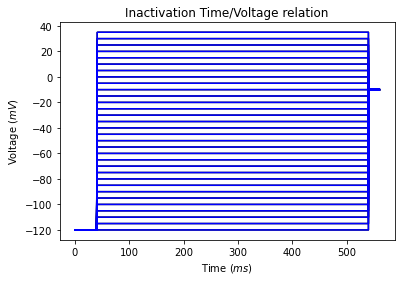

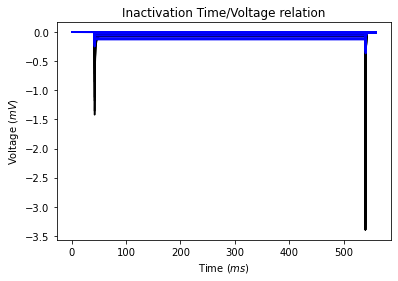

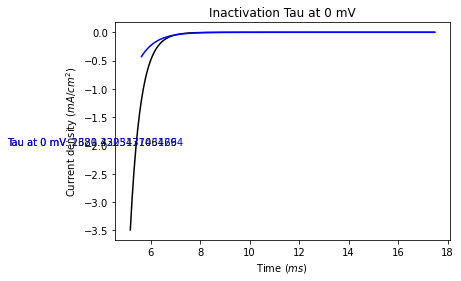

In [4]:
# makes individual plots, and saves the plots as a pdf file to "filename"
eh16.make_act_plots(new_par, filename = './Plots_Folder/jinan_act.pdf')
eh16.make_inact_plots(new_par, filename = './Plots_Folder/jinan_inact.pdf')